(50000, 2)
--------------


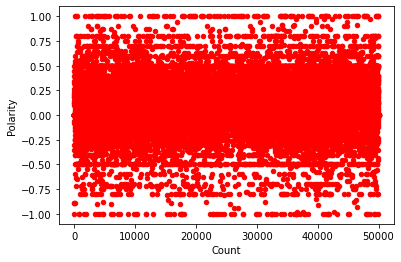

(50000, 2)
--------------


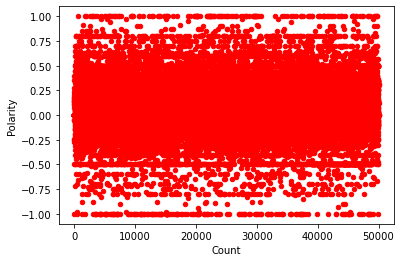

In [11]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sys
import time

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    return text

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getScatterPlot(csv_path):
    df = pd.read_csv(csv_path, header=None, lineterminator='\n')
    df = df.drop(0)
    df = df.drop(columns=[1])
    print(df.shape)
    print('--------------')
    #print(df.head())

    df['Count'] = df[0]
    df['Text'] = df[2]

    df['Text'] = df['Text'].apply(cleanTxt)

    df['Subjectivity'] = df['Text'].apply(getSubjectivity)
    df['Polarity'] = df['Text'].apply(getPolarity) # polarity column
    
    #df_before_covid.to_csv('tweets.csv', index = True)

    #df.plot(kind='scatter',x='Subjectivity',y='Polarity',color='red')
    df.plot(kind='scatter', x='Count', y='Polarity',color='red')
    plt.show()


getScatterPlot("text-tweets-Jan-Feb-50000.csv")
getScatterPlot("text-tweets-May-Sep-50000.csv")
